In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 자연어 처리 패키지

In [ ]:
import nltk
nltk.download("book", quiet = True)
from nltk.book import *

In [ ]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1000])

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[0])

In [ ]:
print(emma_raw[50:100])
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

In [40]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer    : ", [st1.stem(w) for w in words])
print("Lancaster Stemmer : ", [st2.stem(w) for w in words])

In [ ]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

In [ ]:
nouns_list = [t[0] for t in tagged_list if t[1] =="NN"]
nouns_list

In [ ]:
from nltk.tag import untag
untag(tagged_list)

In [ ]:
def tokenizer(doc) :
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

In [ ]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw))

In [38]:
a = retokenize.tokenize("i love you")
a

['i', 'love', 'you']

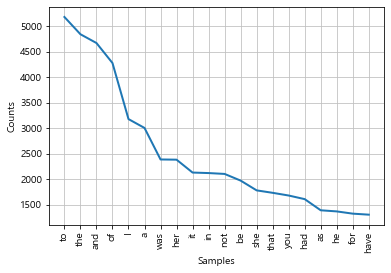

<function matplotlib.pyplot.show(close=None, block=None)>

In [39]:
text.plot(20)
plt.show

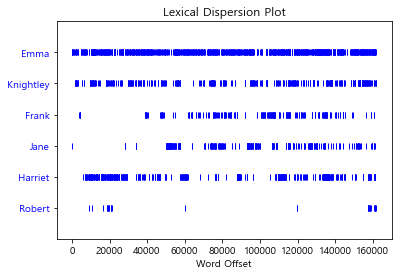

In [42]:
text.dispersion_plot(["Emma","Knightley","Frank", "Jane", "Harriet", "Robert"])

In [43]:
text = Text(retokenize.tokenize(emma_raw))
Text(retokenize.tokenize(emma_raw)).concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [44]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [45]:
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [46]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [48]:
from nltk import FreqDist
stopwords = ["Mr.", "Mrs", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
name_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(name_list)

In [56]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

389

In [58]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

(-0.5, 999.5, 599.5, -0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

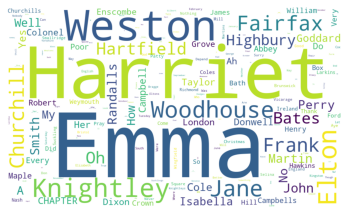

In [67]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 600, background_color = "white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show